### LSTM System Identification

Name: Ananda Cahyo Wibowo<br />
NRP : 07111940000128 <br />
Undergrad Thesis Title : Data Driven Gas Lift Well And Network Optimization With Neural Network Based System Identification Using Modbus Simulator

Data Preparation

In [30]:
import pandas as pd

df1 = pd.read_csv("upsampled_corr_well.csv")
df1 = pd.read_csv("upsampled_corr_well22.csv")

#df1 = pd.read_excel("oa-11_real.xlsx")
#df1 = pd.read_excel("oa-12_real.xlsx")
#df1 = pd.read_excel("oa-12_cleam.xlsx")

df1.describe()

,index,glir,qo,qt,wc,ch,gor,glir_old,tes,gor_old,glir_edit,glir_edit.1
count,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,1969.000000,1969.000000
mean,2484.000000,995.903322,77.586465,82.820298,6.653493,1254.354184,57100.770187,187.294916,14275.192547,5245.958657,149.914957,899.489741
std,1433.993724,747.187112,60.759708,65.292774,8.805085,287.919429,15676.469425,143.047992,3919.117356,15151.169446,120.750490,724.502940
min,1.000000,271.000000,1.000000,1.360000,0.140000,392.860000,30462.680000,54.200000,7615.670000,8.000000,54.200000,325.200000
25%,1242.500000,336.000000,13.300000,14.390000,1.540000,1060.000000,44607.680000,56.000000,11151.920000,400.000000,55.700000,334.200000
50%,2484.000000,793.000000,74.440000,80.380000,4.000000,1297.000000,53852.080000,146.000000,13463.020000,812.500000,95.200000,571.200000
75%,3725.500000,1491.000000,117.720000,124.560000,8.800000,1475.000000,73920.640000,281.200000,18480.160000,1955.640000,210.200000,1261.200000
max,4967.000000,3381.000000,248.370000,272.700000,60.000000,1694.000000,87820.880000,676.200000,21955.220000,107361.960000,533.600000,3201.600000


In [31]:
import seaborn as sb
corr = df1.corr()
print(corr)

                index      glir        qo        qt        wc        ch  \
index        1.000000  0.081394 -0.244253 -0.245292  0.057481  0.375729   
glir         0.081394  1.000000  0.594202  0.604463  0.152644 -0.067704   
qo          -0.244253  0.594202  1.000000  0.995771  0.024547 -0.237773   
qt          -0.245292  0.604463  0.995771  1.000000  0.102120 -0.254246   
wc           0.057481  0.152644  0.024547  0.102120  1.000000 -0.073529   
ch           0.375729 -0.067704 -0.237773 -0.254246 -0.073529  1.000000   
gor          0.108588 -0.670795 -0.894541 -0.884968  0.032710  0.084063   
glir_old    -0.004406  0.990517  0.632723  0.643757  0.166446 -0.089178   
tes          0.108588 -0.670795 -0.894541 -0.884968  0.032710  0.084063   
gor_old     -0.344354 -0.266708 -0.290377 -0.283149  0.014554 -0.285726   
glir_edit    0.096585  1.000000  0.697655  0.708665  0.008661 -0.354939   
glir_edit.1  0.096585  1.000000  0.697655  0.708665  0.008661 -0.354939   

                  gor  g

In [32]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LeakyReLU

from sklearn.model_selection import train_test_split
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator

from tensorflow.keras.models import load_model
import seaborn as sns
#from datetime import datetime

#Read the csv file
df = df1
df2=df.drop(df.columns[0], axis=1)
data = df['glir'].to_numpy()

split = 0.8 #oa - 11 = 0.7 || oa - 12 = 0.8
epoch = 20
batchsize = 300
filename = "RNN_qo_type4_" + f"{epoch}+{batchsize}" 

"""x = df[['glir11','wc11','ch11','gor11']]
y = df[['qo11']]

x1 = df[['glir11','wc11','ch11','gor11']][:int(split*len(data))]
y1 = df[['qo11']][:int(split*len(data))]

x2 = df[['glir11','wc11','ch11','gor11']][int(split*len(data)):]
y2 = df[['qo11']][int(split*len(data)):]"""

x = df[['glir','wc','ch','gor']]
#x = df[['glir','wc']]
#x = df[['glir']]
y = df[['qo']]

x1 = df[['glir','wc','ch','gor']][:int(split*len(data))]
y1 = df[['qo']][:int(split*len(data))]

x2 = df[['glir','wc','ch','gor']][int(split*len(data)):]
y2 = df[['qo']][int(split*len(data)):]

print(f"ukuran x train: {np.shape(x1)} ukuran y train: {np.shape(y1)}")
print(f"ukuran x test: {np.shape(x2)} ukuran y test: {np.shape(y2)}")

ukuran x train: (3973, 4) ukuran y train: (3973, 1)
ukuran x test: (994, 4) ukuran y test: (994, 1)


In [33]:
df.describe()

,index,glir,qo,qt,wc,ch,gor,glir_old,tes,gor_old,glir_edit,glir_edit.1
count,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,1969.000000,1969.000000
mean,2484.000000,995.903322,77.586465,82.820298,6.653493,1254.354184,57100.770187,187.294916,14275.192547,5245.958657,149.914957,899.489741
std,1433.993724,747.187112,60.759708,65.292774,8.805085,287.919429,15676.469425,143.047992,3919.117356,15151.169446,120.750490,724.502940
min,1.000000,271.000000,1.000000,1.360000,0.140000,392.860000,30462.680000,54.200000,7615.670000,8.000000,54.200000,325.200000
25%,1242.500000,336.000000,13.300000,14.390000,1.540000,1060.000000,44607.680000,56.000000,11151.920000,400.000000,55.700000,334.200000
50%,2484.000000,793.000000,74.440000,80.380000,4.000000,1297.000000,53852.080000,146.000000,13463.020000,812.500000,95.200000,571.200000
75%,3725.500000,1491.000000,117.720000,124.560000,8.800000,1475.000000,73920.640000,281.200000,18480.160000,1955.640000,210.200000,1261.200000
max,4967.000000,3381.000000,248.370000,272.700000,60.000000,1694.000000,87820.880000,676.200000,21955.220000,107361.960000,533.600000,3201.600000


## Train Data

Preprocessing Data

In [34]:
scaler = StandardScaler()

df_for_x = scaler.fit_transform(x)
df_for_y = scaler.fit_transform(y)

X = df_for_x
Y = df_for_y

trainX, testX, trainY, testY = train_test_split(X,Y,test_size=1-split,random_state=123,shuffle=False)
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))
print('testX shape == {}.'.format(testX.shape))
print('testY shape == {}.'.format(testY.shape))

lookback = 14
#win_len = int(len(x)/14)
win_len = batchsize
num_feature = np.shape(x)[1]
print('Number of Feature:',num_feature)

train_generator = TimeseriesGenerator(trainX,trainY,batch_size=win_len,length=lookback)
test_generator = TimeseriesGenerator(testX,testY,batch_size=win_len,length=lookback)
#np.shape(train_generator)
#np.shape(test_generator)
#train_generator[0]

trainX shape == (3973, 4).
trainY shape == (3973, 1).
testX shape == (994, 4).
testY shape == (994, 1).
Number of Feature: 4


RNN LSTM Architecture & Training

In [35]:
# define the Autoencoder model

model = Sequential()
#model.add(LSTM(14,activation='relu',input_shape=(lookback, num_feature), return_sequences=True))
model.add(LSTM(160,activation='relu',input_shape=(lookback, num_feature),return_sequences=True))
model.add(LSTM(160,activation='relu',return_sequences=True))
model.add(LSTM(160,activation='relu',return_sequences=False))

model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))

"""model.add(LSTM(180,activation='relu',input_shape=(lookback, num_feature), return_sequences=True))
model.add(LSTM(70,activation='relu', return_sequences=True))
model.add(LSTM(40,activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))"""

model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.summary("")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 14, 160)           105600    
                                                                 
 lstm_7 (LSTM)               (None, 14, 160)           205440    
                                                                 
 lstm_8 (LSTM)               (None, 160)               205440    
                                                                 
 dropout_2 (Dropout)         (None, 160)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 161       
                                                                 
Total params: 516,641
Trainable params: 516,641
Non-trainable params: 0
_________________________________________________________________


In [36]:
from tensorflow.keras.callbacks import Callback
class myCallback(Callback):    
    def on_epoch_end(self, epoch, logs={}):
        print("Checking loss at end of epoch...")
        if logs['loss'] <= 0.05:
               self.model.stop_training = True
        else:
          print ('not yet...')

In [37]:
# fit the model
import tensorflow as tf
#early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,mode='min')

#model.compile(loss=tf.losses.MeanSquaredError(),optimizer=tf.optimizers.Adam(),metrics=[tf.metrics.MeanAbsoluteError()])
epoch = 300
batch_size=800
loss_callback_obj = myCallback()
#history = model.fit(train_generator, validation_data = test_generator, epochs=epoch, batch_size=batch_size, verbose=1,shuffle=False,callbacks=[loss_callback_obj])
history = model.fit(train_generator, validation_data = test_generator, epochs=epoch, batch_size=batch_size, verbose=1,shuffle=False)
#model = load_model(r'C:\Users\ASUS\Documents\AllThingsPython\GLO_NN\NNModel_ann\1LSTM_GLIR_QO2_180_again')
#model.summary("")


Epoch 1/300


14/14 [==============================] - 7s 235ms/step - loss: 1.0396 - mse: 1.0396 - val_loss: 0.5630 - val_mse: 0.5630
Epoch 2/300
14/14 [==============================] - 2s 172ms/step - loss: 0.8468 - mse: 0.8468 - val_loss: 0.3513 - val_mse: 0.3513
Epoch 3/300
14/14 [==============================] - 2s 174ms/step - loss: 0.4125 - mse: 0.4125 - val_loss: 0.3801 - val_mse: 0.3801
Epoch 4/300
14/14 [==============================] - 2s 172ms/step - loss: 0.4451 - mse: 0.4451 - val_loss: 0.2445 - val_mse: 0.2445
Epoch 5/300
14/14 [==============================] - 3s 182ms/step - loss: 0.4567 - mse: 0.4567 - val_loss: 0.5293 - val_mse: 0.5293
Epoch 6/300
14/14 [==============================] - 2s 175ms/step - loss: 0.5311 - mse: 0.5311 - val_loss: 0.5487 - val_mse: 0.5487
Epoch 7/300
14/14 [==============================] - 2s 168ms/step - loss: 0.3344 - mse: 0.3344 - val_loss: 0.1756 - val_mse: 0.1756
Epoch 8/300
14/14 [==============================] - 3s 186ms/step - loss: 0.4514

In [38]:
filename = "3LSTM_ALL_QO2_1601601602"
model.save(filename)

INFO:tensorflow:Assets written to: 3LSTM_ALL_QO2_1601601602\assets


INFO:tensorflow:Assets written to: 3LSTM_ALL_QO2_1601601602\assets


In [39]:
#from tensorflow.keras.models import load_model
#model = load_model("RNN_model_resolved")

Weights and Biasses

[1.0396323204040527, 0.8467524647712708, 0.41252127289772034, 0.4450770914554596, 0.45671001076698303, 0.5311144590377808, 0.3343762755393982, 0.4513673186302185, 0.2536531984806061, 0.3559817373752594, 0.2563719153404236, 0.3069501221179962, 0.22030925750732422, 0.25928667187690735, 0.1907414197921753, 0.22923173010349274, 0.17984840273857117, 0.1806413233280182, 0.19778184592723846, 0.16725581884384155, 0.19031672179698944, 0.20898205041885376, 0.2001906931400299, 0.23182529211044312, 0.17754192650318146, 0.16847698390483856, 0.14545561373233795, 0.1518867164850235, 0.15879222750663757, 0.14327633380889893, 0.1799556463956833, 0.1606595814228058, 0.14867040514945984, 0.1653842180967331, 0.1434592604637146, 0.12935365736484528, 0.13224083185195923, 0.15616001188755035, 0.1396540254354477, 0.17225497961044312, 0.1643383949995041, 0.1349536031484604, 0.1555120348930359, 0.1287541389465332, 0.12201711535453796, 0.12993820011615753, 0.12899190187454224, 0.11058574914932251, 0.190223991870

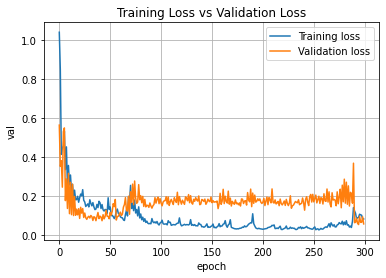

In [40]:
xx = np.arange(0,len(history.history['loss']))

print(history.history['loss'])
print(history.history['val_loss'])
#print(xx)

plt.figure(1)
plt.plot(xx,history.history['loss'], label='Training loss')
plt.plot(xx,history.history['val_loss'], label='Validation loss')
plt.title("Training Loss vs Validation Loss")
plt.xlabel("epoch")
plt.ylabel("val")
plt.legend()
plt.grid()

train value

In [41]:
#trainX[:,:][lookback:]

In [42]:
#print(np.shape(y_pred_train))
#np.shape(trainX[:,:][lookback:])

In [43]:
y_pred_train = model.predict_generator(train_generator)
#y_pred_train = np.reshape(y_pred_train,(np.shape(y_pred_train)[0],14))
df_pred_train = pd.concat([pd.DataFrame(y_pred_train), pd.DataFrame(trainX[:,:][lookback:])],axis=1)

#rev_trans_train = scaler.inverse_transform(df_pred_train)
rev_trans_train = scaler.inverse_transform(y_pred_train)

y_predict_train = np.resize(rev_trans_train[:,0],(len(rev_trans_train[:,0]),1))
y_real = y1[lookback:]

df_final_train = pd.concat([pd.DataFrame(y_predict_train), pd.DataFrame(y_real)],axis=1)
df_final_train
print(y_predict_train.shape)
print(y_real.shape)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_12692/1740566743.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred_train = model.predict_generator(train_generator)


(3959, 1)
(3959, 1)


Text(0.5, 1.0, 'NN Prediction Train')

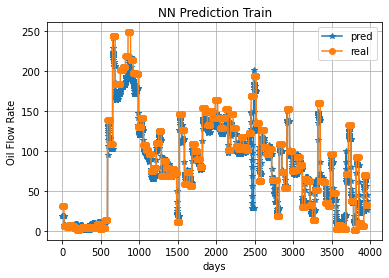

In [44]:
plt.plot(np.arange(0,len(y_predict_train)),y_predict_train,'-*',label='pred')
plt.plot(np.arange(0,len(y_real)),y_real,'-o',label='real')
plt.legend()
plt.grid()
plt.xlabel("days")
plt.ylabel("Oil Flow Rate")
plt.title("NN Prediction Train")

Metric

Root Mean Square Error:
17.08

R2 Value:
0.92


Text(0.5, 1.0, 'R2 Score= 0.92 of Training data')

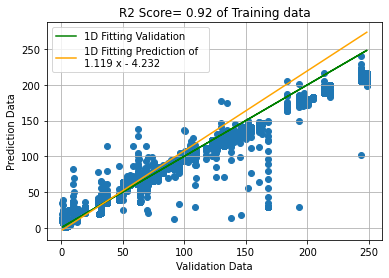

In [45]:
import math
from sklearn.metrics import r2_score

MSE = np.square(np.subtract(y_real,y_predict_train)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:")
print(round(RMSE,2))

r2 = r2_score(y_real,y_predict_train)
print("\nR2 Value:")
print(round(r2,2))

plt.scatter(y_real,y_predict_train)
plt.plot(y_real,y_real,'g',label = '1D Fitting Validation')

mymodel = np.poly1d(np.polyfit(y_predict_train.flatten(),np.array(y_real).flatten(), 1))
myline = np.linspace(min(np.array(y_real)), max(np.array(y_real)))
plt.plot(myline, mymodel(myline), color="orange", label=f'1D Fitting Prediction of {mymodel}')

plt.grid()
plt.legend()
plt.xlabel("Validation Data")
plt.ylabel("Prediction Data")
plt.title(f"R2 Score= {round(r2,2)} of Training data")

### Validating

In [46]:
y_pred_test = model.predict_generator(test_generator)
np.shape(y_pred_test)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_12692/1911091733.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred_test = model.predict_generator(test_generator)


(980, 1)

In [47]:
y_pred_test = model.predict_generator(test_generator)
#y_pred_test = np.reshape(y_pred_test,(np.shape(y_pred_test)[0],14))
rev_trans_test = scaler.inverse_transform(y_pred_test)

y_predict_test = np.resize(rev_trans_test[:,0],(len(rev_trans_test[:,0]),1))
y_real_test = y2[lookback:]

df_final_test = pd.concat([pd.DataFrame(y_predict_test), pd.DataFrame(y_real_test)],axis=1)
df_final_test
print(y_predict_test.shape)
print(y_real_test.shape)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_12692/897810323.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred_test = model.predict_generator(test_generator)


(980, 1)
(980, 1)


Text(0.5, 1.0, 'NN Oil Rate Validation')

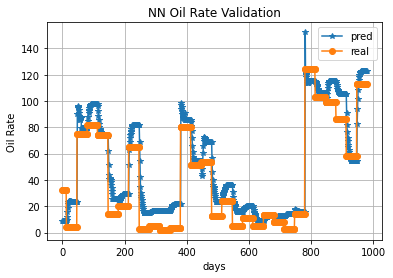

In [48]:
plt.plot(np.arange(0,len(y_predict_test)),y_predict_test,'-*',label='pred')
plt.plot(np.arange(0,len(y_real_test)),y_real_test,'-o',label='real')
plt.grid()
plt.legend()
plt.xlabel("days")
plt.ylabel("Oil Rate")
plt.title(f"NN Oil Rate Validation")

Metric

Root Mean Square Error:
14.39



R2 Value:
0.86


Text(0.5, 1.0, 'R2 Score= 0.86 of Validation data')

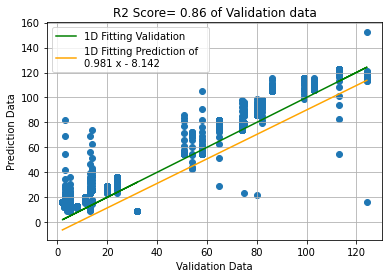

In [49]:
import math
from sklearn.metrics import r2_score

MSE = np.square(np.subtract(y_real_test,y_predict_test)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:")
print(round(RMSE,2))

r2 = r2_score(y_real_test,y_predict_test)
print("\nR2 Value:")
print(round(r2,2))

plt.scatter(y_real_test,y_predict_test)
plt.plot(y_real_test,y_real_test,'g',label = '1D Fitting Validation')

mymodel = np.poly1d(np.polyfit(y_predict_test.flatten(),np.array(y_real_test).flatten(), 1))
myline = np.linspace(min(np.array(y_real_test)), max(np.array(y_real_test)))
plt.plot(myline, mymodel(myline), color="orange", label=f'1D Fitting Prediction of {mymodel}')

plt.grid()
plt.legend()
plt.xlabel("Validation Data")
plt.ylabel("Prediction Data")
plt.title(f"R2 Score= {round(r2,2)} of Validation data")

In [50]:
from scipy.stats import norm
import statistics
    
# Plot between -30 and 30 with
# 0.1 steps.
data = np.subtract(y_real_test,y_predict_test)

#_, bins, _ = plt.hist(data, 20, density=10, alpha=0.5)
#plt.hist(data)
mu, sigma = norm.fit(data)
best_fit_line = norm.pdf(bins, mu, sigma)

#plt.plot(bins, best_fit_line)
x_axis = data
mean = np.mean(x_axis)
sd = np.std(x_axis)   
#plt.hist(x_axis)
plt.plot(x_axis, norm.pdf(x_axis, mean, sd),'*')
plt.title("Error Distribution Histogram")
plt.grid()

NameError: name 'bins' is not defined

In [ ]:
a = scaler.inverse_transform(train_generator[0][0])
a

array([[[  18.63882837,   59.27596992, -104.2148646 ,  105.32281212],
        [  18.63882837,   59.27596992, -104.2148646 ,  105.32281212],
        [  18.63882837,   59.27596992, -104.2148646 ,  105.32281212],
        ...,
        [  18.63882837,   59.27596992, -104.2148646 ,  105.32281212],
        [  18.63882837,   59.27596992, -104.2148646 ,  105.32281212],
        [  18.63882837,   59.27596992, -104.2148646 ,  105.32281212]],

       [[  18.63882837,   59.27596992, -104.2148646 ,  105.32281212],
        [  18.63882837,   59.27596992, -104.2148646 ,  105.32281212],
        [  18.63882837,   59.27596992, -104.2148646 ,  105.32281212],
        ...,
        [  18.63882837,   59.27596992, -104.2148646 ,  105.32281212],
        [  18.63882837,   59.27596992, -104.2148646 ,  105.32281212],
        [  18.63882837,   59.27596992, -104.2148646 ,  105.32281212]],

       [[  18.63882837,   59.27596992, -104.2148646 ,  105.32281212],
        [  18.63882837,   59.27596992, -104.2148646 ,  105.3

## IMPLEMENTATION

In [ ]:
type(str(model.summary("")))
str(model.summary(""))

Model: "sequential_91"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_117 (LSTM)             (None, 14, 180)           133200    
                                                                 
 lstm_118 (LSTM)             (None, 14, 180)           259920    
                                                                 
 lstm_119 (LSTM)             (None, 180)               259920    
                                                                 
 dropout_72 (Dropout)        (None, 180)               0         
                                                                 
 dense_89 (Dense)            (None, 1)                 181       
                                                                 
Total params: 653,221
Trainable params: 653,221
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_91"
________________________

'None'

C:\Users\ASUS\Documents\AllThingsPython\GLO_NN\NNModel_ann\RNN_wc1_type4_20+300
Model: "sequential_91"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_117 (LSTM)             (None, 14, 180)           133200    
                                                                 
 lstm_118 (LSTM)             (None, 14, 180)           259920    
                                                                 
 lstm_119 (LSTM)             (None, 180)               259920    
                                                                 
 dropout_72 (Dropout)        (None, 180)               0         
                                                                 
 dense_89 (Dense)            (None, 1)                 181       
                                                                 
Total params: 653,221
Trainable params: 653,221
Non-trainable params: 0
_________________________________

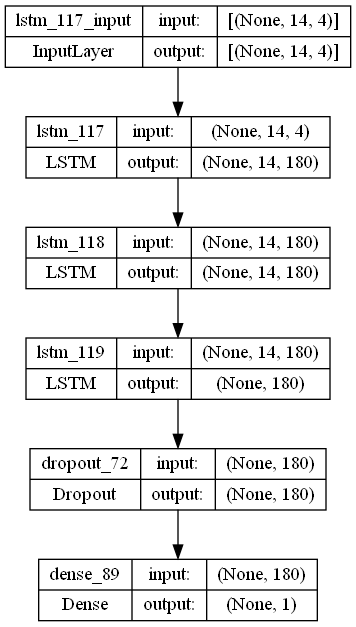

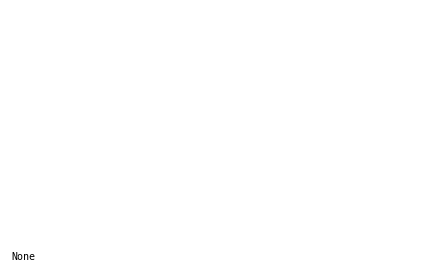

In [ ]:
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
from keras.utils.vis_utils import plot_model

file_pre = 'C:/Users/ASUS/Documents/AllThingsPython/GLO_NN/NNModel_ann/RNN_wc1_type4_20+300'
file_pretrained = file_pre.replace('/','\\')
print(file_pretrained)
#model = load_model(f"{file_pretrained}")
print(str(model.summary("")))

#plt.rc('figure', figsize=(8, 5))
plt.text(0.01, 0.05, str(model.summary("")), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
#plt.savefig('results.png')
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

1/1 [==============================] - 0s 20ms/step


,pred qo,glir11,wc11,ch11,gor11,pred qt,pred qw
0,91.558861,4191.0,38.0,1691.0,101731.0,147.675582,56.116721
1,83.218140,605.0,16.0,900.0,44868.0,99.069214,15.851074
2,79.020866,5094.0,6.0,908.0,52394.0,84.064751,5.043885
3,73.047775,2561.0,50.0,1619.0,42642.0,146.095551,73.047775
4,67.063446,1576.0,43.0,1531.0,55405.0,117.655168,50.591722
...,...,...,...,...,...,...,...
145,111.949661,4885.0,47.0,573.0,63390.0,211.225776,99.276115
146,107.071022,6161.0,54.0,1581.0,50191.0,232.763091,125.692069
147,78.284729,4387.0,38.0,1121.0,104537.0,126.265692,47.980963
148,107.724197,6068.0,5.0,744.0,52722.0,113.393892,5.669695


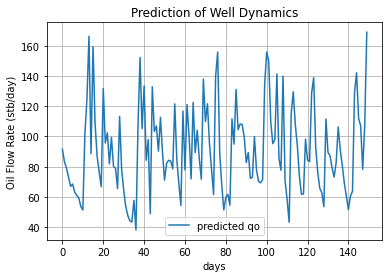

In [ ]:
import numpy as np
import random
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import load_model
#model = load_model(r'C:\Users\ASUS\Documents\AllThingsPython\GLO_NN\NNModel_new\RNN_qo_type7_100+14')
#model = load_model(r'C:\Users\ASUS\Documents\AllThingsPython\GLO_NN\NNModel_ann\RNN_qo_type2_20+300')
o = list(np.ones(14)*180)
p = list(np.ones(14)*250)
q = list(np.ones(14)*700)
r = list(np.ones(14)*100)

tot = np.stack((o,p,q,r),axis=1).reshape(1,-1,4)
#scale = StandardScaler(tot[0][:][:])
#tot = scale.fit_transform(tot)
#print(tot)
scaler = StandardScaler()
scale = StandardScaler().fit(y)
SS = scale.fit_transform(y)
tot.shape
otemp = o
ptemp = p
qtemp = q
rtemp = r
#x = 'glir11','wc11','ch11','gor11']]
t=0
value_features = []
value_pred = []
qt_tot = []
qw_tot = []
while t<150:
    #otemp.append(random.randint(54,300))
    #ptemp.append(random.randint(4,63))
    #qtemp.append(random.randint(465,1767))
    #rtemp.append(random.randint(7615,21955))
    
    otemp.append(random.randint(20,6220))
    ptemp.append(random.randint(5,60))
    qtemp.append(random.randint(392,1737))
    rtemp.append(random.randint(10,107361))
    #otemp.append(5.4*t+100)
    #ptemp.append(3.2*t+20)
    #qtemp.append(2*t)
    #rtemp.append(10*t+10)
    o = otemp[-14:]
    p = ptemp[-14:]
    q = qtemp[-14:]
    r = rtemp[-14:]

    tot = np.stack((o,p,q,r),axis=1).reshape(1,-1,4)
    current = tot[0][-1][:]
    wc = tot[0][-1][1]
    #print(tot)
    Tot = scaler.fit_transform(tot[0])
    Tot = Tot.reshape(1,14,4)
    s = model.predict(Tot)
    S = scale.inverse_transform(s)

    qt = S[0][0]/((100-wc)/100)
    qw = qt-S[0][0]

    value_pred.append(abs(S[0][0]))
    value_features.append(current)
    qt_tot.append(qt)
    qw_tot.append(qw)
    t+=1

header = ['glir11','wc11','ch11','gor11']
dff = pd.concat([pd.DataFrame(value_pred,columns=['pred qo']), pd.DataFrame(value_features,columns=header),
    pd.DataFrame(qt_tot,columns=['pred qt']), pd.DataFrame(qw_tot,columns=['pred qw'])],axis=1)

import matplotlib.pyplot as plt

#plt.plot(dff[['glir11']],label='predicted glir')
plt.plot(value_pred,label='predicted qo')
#plt.plot(qt_tot,label='predicted qt')
#plt.plot(qw_tot,label='predicted qw')
plt.legend()
plt.grid()
plt.xlabel('days')
plt.ylabel('Oil Flow Rate (stb/day)')
plt.title("Prediction of Well Dynamics")

dff


In [ ]:
def normalize_rmse_values(rmse_values, new_min, new_max):
    min_value = min(rmse_values)
    max_value = max(rmse_values)
    
    normalized_values = []
    for value in rmse_values:
        normalized_value = (value - min_value) / (max_value - min_value) * (new_max - new_min) + new_min
        normalized_values.append(normalized_value)
    
    return normalized_values

rmse_values = [27, 40, 50, 60, 80]
new_min = 0
new_max = 1

normalized_values = normalize_rmse_values(rmse_values, new_min, new_max)
print(normalized_values)

[0.0, 0.24528301886792453, 0.4339622641509434, 0.6226415094339622, 1.0]
